# Обработка файлов с данными из CST
$$F(\theta) = F_1(\theta)\frac{sin\left[\frac{nkd}{2}\left(sin \theta - sin \theta_M\right)\right]}{n sin\left[\frac{kd}{2}\left(sin \theta - sin \theta_M\right)\right]}$$
-------------------------
$$\left(1+x\right)^n=1+\frac{nx}{1!}+\frac{n\left(n-1\right)x^2}{2!}+\ldots$$


[4.033 4.018 3.973 3.899 3.799 3.676 3.535 3.38  3.216 3.049 2.884 2.725
 2.579 2.448 2.336 2.246 2.18  2.14  2.127 2.14  2.18  2.246 2.336 2.448
 2.58  2.727 2.887 3.053 3.222 3.387 3.543 3.685 3.807 3.907 3.98  4.025
 4.04  4.025 3.98  3.907 3.807 3.685 3.543 3.387 3.222 3.053 2.887 2.727
 2.58  2.448 2.336 2.246 2.18  2.14  2.127 2.14  2.18  2.246 2.336 2.448
 2.579 2.725 2.884 3.049 3.216 3.38  3.535 3.676 3.799 3.899 3.973 4.018]
72
[-180. -175. -170. ...  165.  170.  175.]
-90.0
[4.033 3.916 3.564 ... 2.98  3.564 3.916]
2664


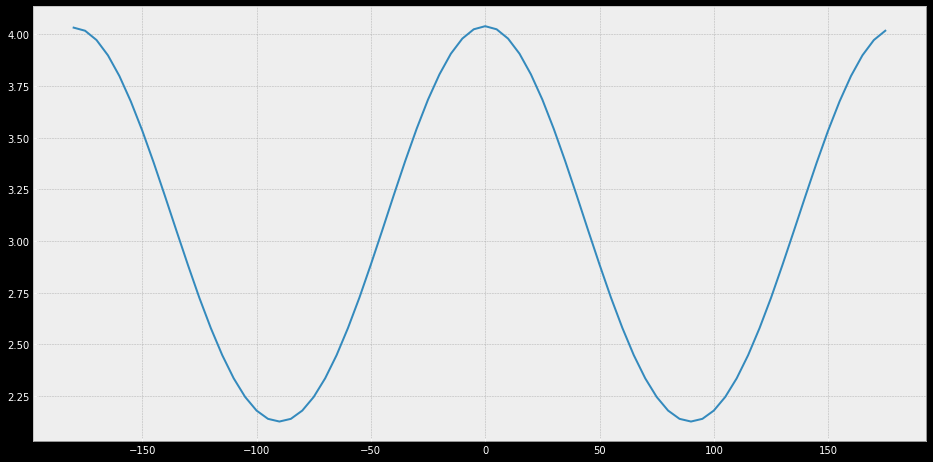

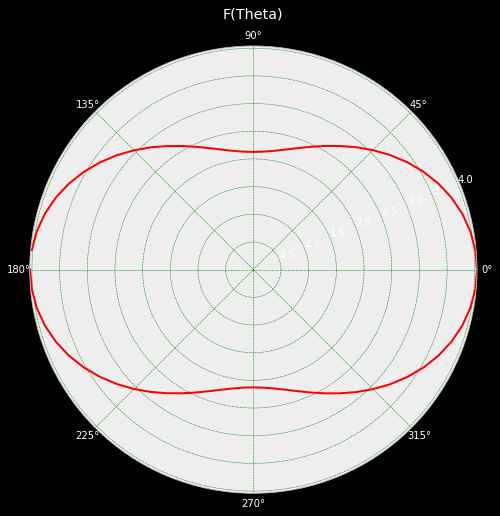

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#try:
#    f = open("C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt", mode = 'r', encoding = 'utf-8')
#    for line in f:
#        print(line, end='')
#finally:
#    f.close()


with open(r"C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt","r", encoding = 'utf-8') as f:
    data = f.readlines()
    N = len(data)
    theta = np.array([float(data[2][0:8])])
    phi = np.array([float(data[2][17:24])])
    F = np.array([float(data[2][35:45])])
    
    
    for i in range(1,N-2):
        phi = np.append(phi, float(data[i+2][17:24]))
        theta = np.append(theta, float(data[i+2][0:8]))
        F = np.append(F, float(data[i+2][35:45]))

N = len(theta)
phi0 = 0.0

FF1 = np.zeros(72)
theta1 = np.zeros(72)
j = 0
for i in range (0,N):
    if phi[i]==phi0:
        FF1[j] = F[i]
        theta1[j] = theta[j]
        j=j+1
    

print(FF1)
print(len(FF1))

print(theta)
print(phi[0])
print(F)
print(len(F))

 
plt.style.use('bmh')   
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(theta1, FF1)

fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(231, projection='polar')
ax2.plot(theta1*np.pi/180, FF1, color='r', linewidth=2)
 ax2.set_ylim(ymax=max(FF1))
# ax2.set_ylim(ymin=-50, ymax=max(FF1))
    # Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
    # Однако, будет разрыв между последней точкой и нулевой.
    # Чтобы его убрать, искусственно соединим эти точки.
    # Замыкаем (соединяем конец с началом)
#ax2.plot((theta[-1],theta[0]),(DN[-1],DN[0]), color='r', linewidth=1.)
ax2.grid(True, color='green', linestyle='--')
ax2.set_title("F(Theta)", loc='center')
plt.tight_layout()
